## Objective
In this exercise, your goal is to correctly identify digits from a dataset of handwritten images.

The dataset contains gray-scale images of hand-drawn digits, from zero through nine. It contains 42,000 images.
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
The data set, has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.
Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

You are expected to:
- Experiment with different models and settings and decide on the best model for this dataset
- Write a brief report (2-4 pages maximum) describing the choices you made and the evaluation you performed

### Import Libraries


In [52]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC

# Utilities
import os 
import gc

### Load the Dataset

In [16]:
all_digits     = pd.read_csv('digit_recognizer_dataset.csv')

### Data Overview

In [18]:
all_digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


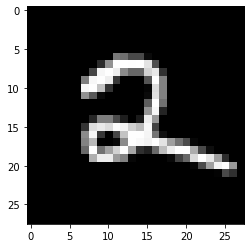

In [44]:
def print_digit(row):
    first_image = all_digits[label=1].iloc[row][1:]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

print_digit(41000)

### Train / Test Split

In [43]:
features = all_digits.columns[1:]
X = all_digits[features]
y = all_digits['label']
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.1,random_state=0)

### Models Declaration


In [54]:

# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('XGB',  XGBClassifier()))
models.append(('MLP',  MLPClassifier()))
models.append(('RF',  RandomForestClassifier()))

models.append(('SVM', SVC()))

In [55]:
results = []
names   = []
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, scoring='accuracy', n_jobs= -1, verbose=2)
  results.append(cv_results)
  names.append(name)
  print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.4s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
 LR: 0.917487 (+/- 0.002200)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.8s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
LDA: 0.863915 (+/- 0.005749)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()